In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"spotify_churn_dataset.csv")
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [3]:
df1=pd.read_csv(r"spotify_churn_new_data_additional.csv")
df1.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,8001,Female,44,IN,Family,190,72,0.12,Desktop,0,1,0
1,8002,Male,57,PK,Premium,135,49,0.14,Desktop,0,0,0
2,8003,Other,24,UK,Free,315,78,0.06,Web,53,1,0
3,8004,Male,55,DE,Premium,191,62,0.04,Mobile,0,1,0
4,8005,Male,22,US,Student,231,86,0.12,Desktop,0,0,0


In [4]:
# df=pd.concat([df,df1],axis=0,ignore_index=True)
# df

In [5]:
df.drop(columns="user_id",inplace=True)

In [6]:
df.describe(include="all")

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
count,8000,8000.000000,8000,8000,8000.000000,8000.000000,8000.000000,8000,8000.000000,8000.000000,8000.000000
unique,3,NaN,8,4,NaN,NaN,NaN,3,NaN,NaN,NaN
top,Male,NaN,AU,Premium,NaN,NaN,NaN,Desktop,NaN,NaN,NaN
freq,2691,NaN,1034,2115,NaN,NaN,NaN,2778,NaN,NaN,NaN
mean,NaN,37.662125,NaN,NaN,154.068250,50.127250,0.300127,NaN,6.943875,0.747750,0.258875
std,NaN,12.740359,NaN,NaN,84.015596,28.449762,0.173594,NaN,13.617953,0.434331,0.438044
min,NaN,16.000000,NaN,NaN,10.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,NaN,26.000000,NaN,NaN,81.000000,25.000000,0.150000,NaN,0.000000,0.000000,0.000000
50%,NaN,38.000000,NaN,NaN,154.000000,50.000000,0.300000,NaN,0.000000,1.000000,0.000000
75%,NaN,49.000000,NaN,NaN,227.000000,75.000000,0.450000,NaN,5.000000,1.000000,1.000000


In [7]:
numerical_columns=df.select_dtypes("number").columns.tolist()
numerical_columns=numerical_columns[:-2]

In [8]:
numerical_columns

['age',
 'listening_time',
 'songs_played_per_day',
 'skip_rate',
 'ads_listened_per_week']

In [9]:
def min_max_scaler(df):
    df1=df[numerical_columns].copy()
    for col in numerical_columns:
        df1[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())
    return df1

df_standardized=min_max_scaler(df)

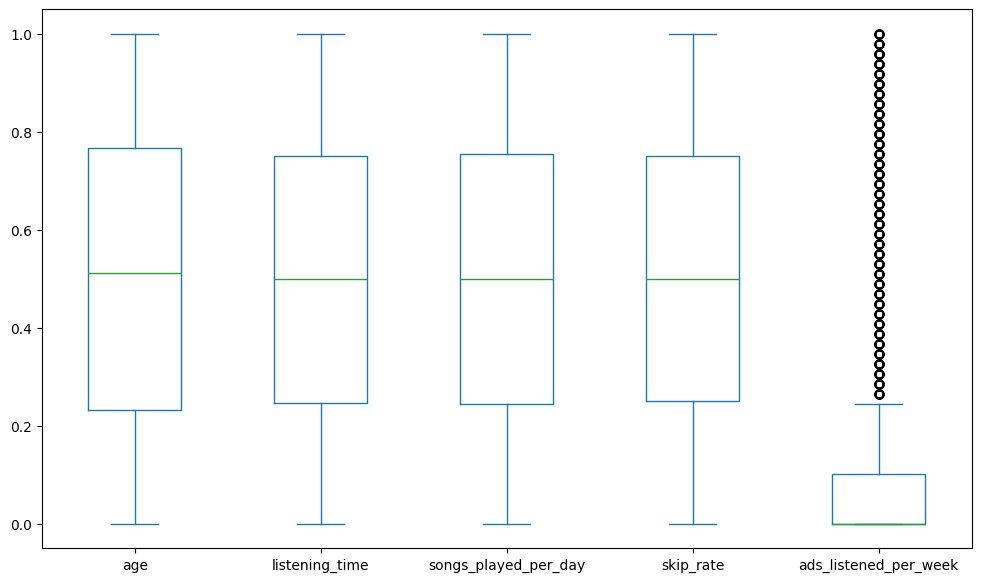

In [10]:
fig,ax=plt.subplots(figsize=(12,7))
df_standardized.plot(kind="box",ax=ax)
plt.show()

In [15]:
Q1=df["ads_listened_per_week"].quantile(.25)
Q3=df["ads_listened_per_week"].quantile(.75)
IQR=Q3-Q1
ub=Q3+1.5*IQR
lb=Q1-1.5*IQR

df_cleaned=df[(df["ads_listened_per_week"]<ub)&(df["ads_listened_per_week"]>lb)]
print("intial count with outliers:",len(df))
print("count without outliers:",len(df_cleaned))

intial count with outliers: 8000
count without outliers: 6317
